In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

import gensim

import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

In [ ]:
#DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 50
W2V_MIN_COUNT = 2
SEQUENCE_LENGTH = 300

In [ ]:
data = pd.read_csv("/content/drive/My Drive/DL_Project/notebookks/basit/new_data/final_dataset.csv", encoding = DATASET_ENCODING)

In [ ]:
data.head(3)

,date,time,text,clean_text,labels
0,2020-02-24,23:07:43,"I gasped cuz at first I read, ""Do you believe...","I gasped cuz at first I read, ""Do you believe...",3
1,2020-03-01,23:47:43,All Aboard The Blessed Trump Train!\n\n#A1\n#A...,All Aboard The Blessed Trump Train!\n\n#A1\n#A...,2
2,2020-03-03,23:54:58,Dow Sinks After Federal Reserve Rate Cut To Ea...,Dow Sinks After Federal Reserve Rate Cut To Ea...,1


Text(0.5, 1.0, 'Dataset labels distribuition')

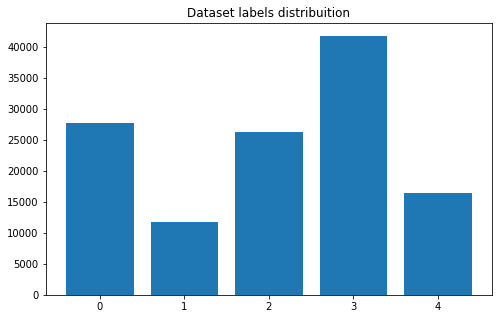

In [ ]:
target_cnt = Counter(data.labels)
plt.figure(figsize=(8,5))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

**Pre-Processing**

Try1 (Not removing stop words, Not removing ' punctuation, retraining)

In [ ]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9\']+"
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    return text
data.clean_text = data.clean_text.apply(lambda x: preprocess(x))

In [ ]:
# split data into train/test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 99163
TEST size: 24791


In [ ]:
documents = [_text.split() for _text in df_train.clean_text]
w2v = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, window=W2V_WINDOW, min_count=W2V_MIN_COUNT, workers=8)
w2v.build_vocab(documents)
words = w2v.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 32434


In [ ]:
words

dict_keys(['trump', 'just', 'blamed', 'barack', 'obama', 'for', 'the', 'coronavirus', 'spread', 'topbuzz', 'yet', 'more', 'from', 'department', 'of', 'peace', 'order', 'good', 'government', 'cdnpoli', 'repeatedly', 'misunderstands', 'health', 'officials', 'advising', 'him', 'about', 'course', 'it', 'will', 'but', 'takes', 'time', 'people', 'need', 'to', 'take', 'seriously', 'and', 'stay', 'at', 'home', 'have', 'faith', 'now', 'that', 'researchers', 'mit', 'found', 'a', 'sneeze', 'carries', 'droplets', '27', 'feet', "it's", 'spreads', 'quickly', 'sometimes', 'before', 'symptoms', 'study', 'finds', 'my', 'evening', 'entertainment', 'sorted', 'plagueincpic', 'twitter', 'com', 'see', 'how', 'much', 'testing', 'is', 'happening', 'in', 'each', 'state', 'via', 'an', 'elderly', 'woman', 'who', 'died', 'after', 'contracting', 'weekend', 'initially', 'tested', 'negative', 'deadly', 'disease', 'media', 'survivors', "what's", 'verdict', 'on', 'these', 'popular', 'myths', 'turkey', 'covid19', 'deat

In [ ]:
w2v.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(76482624, 98746900)

In [ ]:
w2v.wv.most_similar("virus")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('coronavirus', 0.4829676151275635),
 ('it', 0.4010300636291504),
 ('that', 0.35310566425323486),
 ('and', 0.3508104979991913),
 ('the', 0.3428367078304291),
 ('zoster', 0.3393721282482147),
 ('beer', 0.323347806930542),
 ('pneumonia', 0.29435598850250244),
 ('but', 0.2903642952442169),
 ('to', 0.2901083528995514)]

In [ ]:
w2v.wv.save_word2vec_format('/content/drive/My Drive/DL_Project/notebookks/basit/new_data/embeddings_with_stopwords.txt', binary=False)
df_train.to_csv('/content/drive/My Drive/DL_Project/notebookks/basit/new_data/new_data_with_trainset.csv', index=False)
df_test.to_csv('/content/drive/My Drive/DL_Project/notebookks/basit/new_data/new_data_with_testset.csv', index=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# Tokenization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.clean_text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Using TensorFlow backend.


Total words 83065


In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.clean_text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.clean_text), maxlen=SEQUENCE_LENGTH)

In [ ]:
labels = df_train.labels.unique().tolist()
labels

[4, 3, 2, 0, 1]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_train.labels.tolist())

y_train = np.array(df_train.labels)
y_test = np.array(df_test.labels)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (99163, 1)
y_test (24791, 1)


In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (99163, 300)
y_train (99163, 1)

x_test (24791, 300)
y_test (24791, 1)


In [ ]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))

for word, i in tokenizer.word_index.items():
  if word in w2v.wv:
    embedding_matrix[i] = w2v.wv[word]
print(embedding_matrix.shape)

(83065, 300)


In [ ]:
np.savez('/content/drive/My Drive/DL_Project/notebookks/basit/new_data/embedding_matrix_with_stop.npy', embedding_matrix)
np.savez('/content/drive/My Drive/DL_Project/notebookks/basit/new_data/trainset_with_stop.npy', x_train, y_train, allow_pickle=True)
np.savez('/content/drive/My Drive/DL_Project/notebookks/basit/new_data/testset_with_stop.npy', x_test, y_test, allow_pickle=True)

Embeddings without Stop words

In [ ]:
#DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 130
W2V_MIN_COUNT = 2
SEQUENCE_LENGTH = 300

In [ ]:
data = pd.read_csv("/content/drive/My Drive/DL_Project/notebookks/basit/new_data/final_dataset.csv", encoding = DATASET_ENCODING)
w2v_data = pd.read_csv("/content/drive/My Drive/DL_Project/notebookks/basit/final_w2v_dataset.csv", encoding = DATASET_ENCODING)
unseen_data = pd.read_csv("/content/drive/My Drive/DL_Project/notebookks/basit/final_unseen_dataset.csv", encoding = DATASET_ENCODING)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(len(data))
print(len(unseen_data))
print(len(w2v_data))

123954
1756246
1879901


Text(0.5, 1.0, 'Dataset labels distribuition')

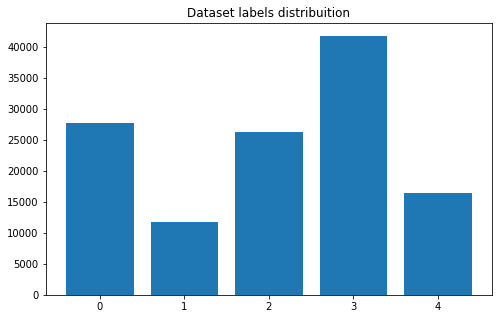

In [ ]:
target_cnt = Counter(data.labels)
plt.figure(figsize=(8,5))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [ ]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9\']+"
nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
def preprocess(text, stem=False):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    # tokens = []
    # for token in text.split():
    #     if token not in stop_words:
    #         if stem:
    #             tokens.append(stemmer.stem(token))
    #         else:
    #             tokens.append(token)
    #text = " ".join(tokens)
    return text
data.clean_text = data.clean_text.apply(lambda x: preprocess(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9\']+"
nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
def preprocess(text, stem=False):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    # tokens = []
    # for token in text.split():
    #     if token not in stop_words:
    #         if stem:
    #             tokens.append(stemmer.stem(token))
    #         else:
    #             tokens.append(token)
    # text = " ".join(tokens)
    return text
w2v_data.clean_text = w2v_data.clean_text.apply(lambda x: preprocess(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9\']+"
nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
def preprocess(text, stem=False):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    # for token in text.split():
    #     if token not in stop_words:
    #         if stem:
    #             tokens.append(stemmer.stem(token))
    #         else:
    #             tokens.append(token)
    # text = " ".join(tokens)
    return text
unseen_data.clean_text = unseen_data.clean_text.apply(lambda x: preprocess(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
documents = [len(_text.split()) for _text in w2v_data.clean_text]
np.max(documents)

224

In [ ]:
# split data into train/test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 99163
TEST size: 24791


In [ ]:
documents = [_text.split() for _text in w2v_data.clean_text]
w2v = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, window=W2V_WINDOW, min_count=W2V_MIN_COUNT, workers=8)
w2v.build_vocab(documents)
words = w2v.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 220070


In [ ]:
words

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
w2v.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(4587504331, 5713475950)

In [ ]:
w2v.wv.most_similar("virus")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('coronavirus', 0.589235246181488),
 ('disease', 0.5517306923866272),
 ('viruses', 0.507000207901001),
 ('pathogen', 0.4444354176521301),
 ('bug', 0.4431490898132324),
 ('wuhanvirus', 0.4381004273891449),
 ("virus'", 0.4106513261795044),
 ('viruse', 0.38086020946502686),
 ("coronavirus'", 0.38054877519607544),
 ('humans', 0.37249958515167236)]

In [ ]:
w2v.wv.save_word2vec_format('/content/drive/My Drive/DL_Project/notebookks/basit/final exp/embeddings.txt', binary=False)
data.to_csv('/content/drive/My Drive/DL_Project/notebookks/basit/final exp/dataset.csv', index=False)
df_train.to_csv('/content/drive/My Drive/DL_Project/notebookks/basit/final exp/trainset.csv', index=False)
df_test.to_csv('/content/drive/My Drive/DL_Project/notebookks/basit/final exp/testset.csv', index=False)
w2v_data.to_csv('/content/drive/My Drive/DL_Project/notebookks/basit/final exp/w2v_data.csv', index=False)
unseen_data.to_csv('/content/drive/My Drive/DL_Project/notebookks/basit/final exp/unseen_data.csv', index=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# Tokenization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(w2v_data.clean_text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Using TensorFlow backend.


Total words 567782


In [ ]:
import pickle
with open('/content/drive/My Drive/DL_Project/notebookks/basit/final exp/w2v_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/My Drive/DL_Project/notebookks/basit/w2v_tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.clean_text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.clean_text), maxlen=SEQUENCE_LENGTH)
x_unseen = pad_sequences(tokenizer.texts_to_sequences(unseen_data.clean_text), maxlen=SEQUENCE_LENGTH)

In [ ]:
labels = df_train.labels.unique().tolist()
labels

[4, 3, 2, 0, 1]

In [ ]:
y_train = np.array(df_train.labels)
y_test = np.array(df_test.labels)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (99163, 1)
y_test (24791, 1)


In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (99163, 300)
y_train (99163, 1)

x_test (24791, 300)
y_test (24791, 1)


In [ ]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v.wv:
    embedding_matrix[i] = w2v.wv[word]
print(embedding_matrix.shape)

(567782, 300)


In [ ]:
train_dict = {date: df_train.date, time: df_train.time, text: df_train.text, clean_text: df_train.clean_text, XData: x_train, YData: y_train}
test_dict = {date: df_test.date, time: df_test.time, text: df_test.text, clean_text: df_test.clean_text, XData: x_test, YData: y_test}
unseen_dict = {date: unseen_data.date, time: unseen_data.time, text: unseen_data.text, clean_text: unseen_data.clean_text, XData: x_unseen}

In [ ]:
np.savez('/content/drive/My Drive/DL_Project/notebookks/basit/final exp/embedding_matrix_np', embedding_matrix)
np.savez('/content/drive/My Drive/DL_Project/notebookks/basit/final exp/trainset_np',    df_train.date,    df_train.time,    df_train.text,      df_train.clean_text,    x_train,  y_train, allow_pickle=True)
np.savez('/content/drive/My Drive/DL_Project/notebookks/basit/final exp/testset_np',     df_test.date,     df_test.time,     df_test.text,       df_test.clean_text,     x_test,   y_test,  allow_pickle=True)
np.savez('/content/drive/My Drive/DL_Project/notebookks/basit/final exp/unseen_data_np', unseen_data.date, unseen_data.time, unseen_data.text, unseen_data.place, unseen_data.coordinates, unseen_data.country, unseen_data.clean_text, x_unseen         , allow_pickle=True)

In [ ]:
unseen_data

,date,time,text,coordinates,place,country,clean_text
0,2020-03-20,03:55:54,Corona day 3: it just feels like Sunday again ...,NaN,NaN,NaN,corona day 3 it just feels like sunday again a...
1,2020-03-20,03:55:56,Can everyone just stay at home please so that ...,NaN,NaN,NaN,can everyone just stay at home please so that ...
2,2020-03-20,03:55:54,Hundreds of Indian doctors are on the frontlin...,NaN,NaN,NaN,hundreds of indian doctors are on the frontlin...
3,2020-03-20,03:55:55,"@kalamojakka @prayingmedic Literally, a spokes...",NaN,NaN,NaN,literally a spokesperson for them was at my sc...
4,2020-03-20,03:55:54,Coronavirus is a basic or general name for the...,NaN,NaN,NaN,coronavirus is a basic or general name for the...
...,...,...,...,...,...,...,...
1756241,2020-06-11,23:35:37,@GovRonDeSantis @TheRealAAU Florida should not...,NaN,NaN,NaN,florida should not be hosting anything while c...
1756242,2020-06-24,18:02:34,New York City Marathon Cancelled Due to Corona...,NaN,NaN,NaN,new york city marathon cancelled due to corona...
1756243,2020-06-15,03:06:17,"@himantabiswa\nSharing You a video, just watch...",NaN,NaN,NaN,sharing you a video just watch seeing the cond...
1756244,2020-06-16,20:11:35,"@Naagoon1 Some laughs here in beginning, but h...",NaN,NaN,NaN,some laughs here in beginning but he gets to t...


In [ ]:
len(aa)

139813